<a href="https://colab.research.google.com/github/WoojinJeonkr/Data-Analysis/blob/main/%EC%A7%80%EB%A6%AC_%EC%A0%95%EB%B3%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0(GIS)_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GeoPandas**

In [1]:
# pip install geopandas

In [2]:
import geopandas as gpd

In [3]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [5]:
countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [6]:
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


# **지리 정보 시각화**

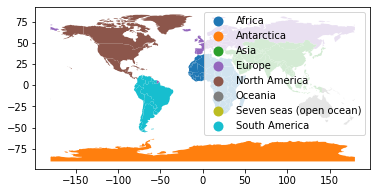

In [7]:
ax = countries.plot(column="continent", legend=True, categorical=True)

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


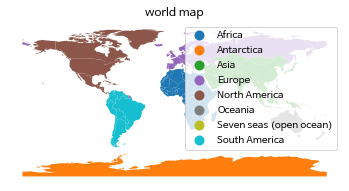

In [9]:
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("world map")
ax.set_axis_off()
plt.show()

In [10]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

In [11]:
# pip install mapclassify

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


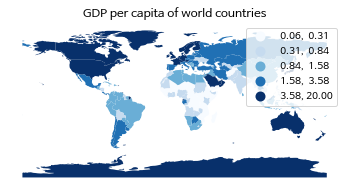

In [12]:
ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("GDP per capita of world countries")
plt.show()

# **Geometry 데이터**

## **Polygons**
한 국가의 영토 따위 등은 여러 개의 점을 이은 다각형으로 표현 가능

In [13]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [14]:
# 여러 개의 점(Point)들로 이루어져있다.
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575002 53.470121568406555, 23.80493493011778 53.089731350306074, 23.79919884613338 52.69109935160657, 23.199493849386187 52.48697744405367, 23.508002150168693 52.02364655212473, 23.52707075368437 51.57845408793031, 24.029985792748903 50.70540660257518, 23.92275719574326 50.42488108987874, 23.426508416444392 50.30850576435745, 22.518450148211603 49.47677358661974, 22.776418898212626 49.02739533140962, 22.558137648211755 49.085738023467144, 21.607808058364213 49.47010732685409, 20.887955356538413 49.32877228453583, 20.415839471119853 49.43145335549977, 19.825022820726872 49.21712535256923, 19.320712517990472 49.571574001659194, 18.90957482267632 49.435845852244576, 18.853144158613617 49.49622976337764, 18.392913852622172 49.98862864847075, 17.64944502123899 50.049038397819956, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.719475945714436 50.21574656839354, 16.176253289462267 50.42260732685791, 16.23

## **Points**

In [15]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


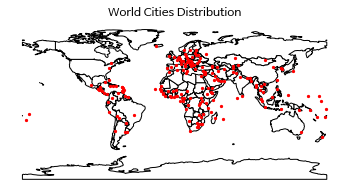

In [16]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("World Cities Distribution")
plt.show()

## **LineString**

In [17]:
korea_border = countries[countries.name == "Korea"].geometry

In [18]:
korea_border.boundary.squeeze()

GeoSeries([], dtype: geometry)

## **GeoPandas의 지리 데이터 간의 관계 연산 예제**

In [19]:
from shapely.geometry import Point, Polygon, LineString

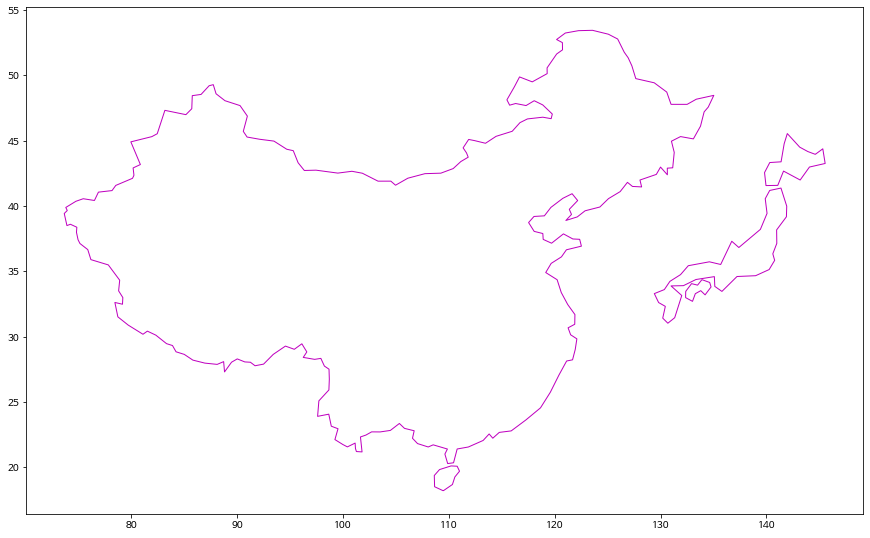

In [20]:
northern_asia = countries.loc[countries['name'].isin(['Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

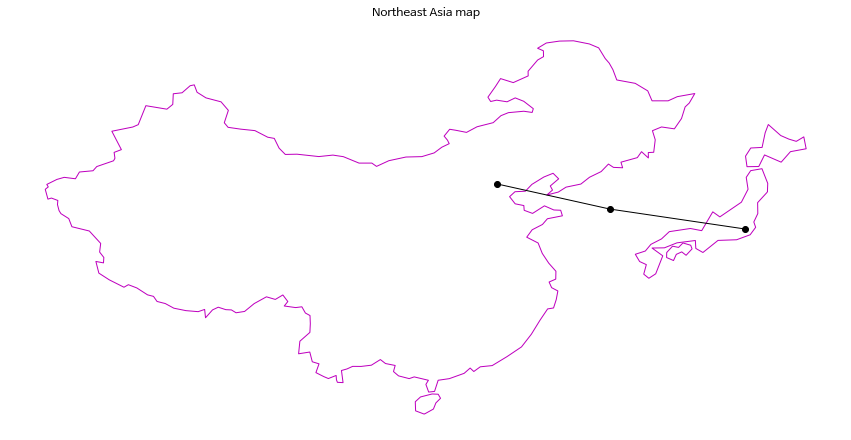

In [21]:
northern_asia = countries.loc[countries['name'].isin(['Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("Northeast Asia map")
ax.set_axis_off()
plt.show()

In [22]:
korea = countries.loc[countries['name'] == 'Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

In [23]:
countries[countries.crosses(line)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",3.900313


## **속성을 이용한 연산**

In [24]:
seoul.distance(beijing)

10.871264032732043

In [25]:
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",2.632550
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",3.900313


## **지리 정보 조작**

In [26]:
seoul_file = "/content/TL_KODIS_BAS.shp"

In [27]:
seoul = gpd.read_file(seoul_file, encoding='euckr')

In [28]:
seoul.tail(3)

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
5662,0.266464,05414,1174000215,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((971485.617 1952675.751, 971012.401 1..."
5663,0.129090,05415,1174000216,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((971012.401 1952516.672, 971485.617 1..."
5664,0.127814,05416,1174000217,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((972009.566 1950230.226, 971960.491 1..."


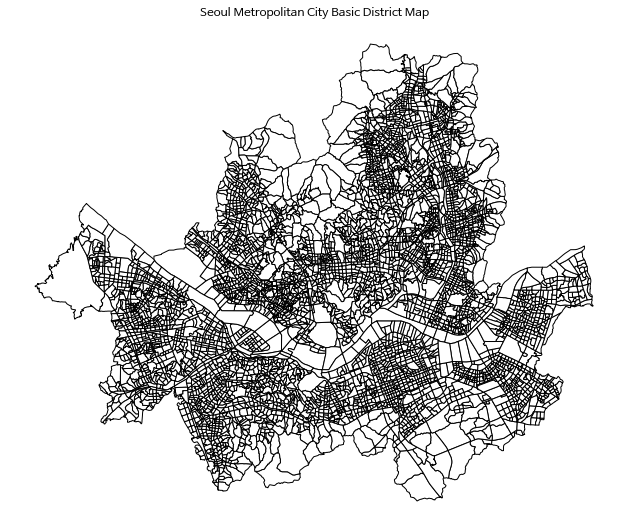

In [29]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("Seoul Metropolitan City Basic District Map")
ax.set_axis_off()
plt.show()

### 동작구의 기초 구역도를 convex_hull, envelope, unary_union을 이용해 변환

In [30]:
sample = seoul[seoul.SIG_KOR_NM == "동작구"]

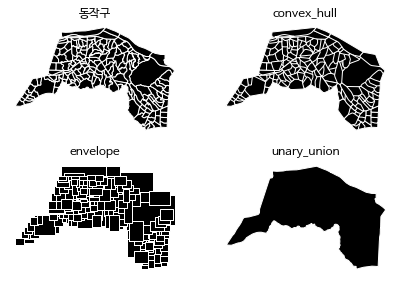

In [31]:
ax = plt.subplot(2, 2, 1)
sample.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("동작구")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4)
gpd.GeoSeries([sample.geometry.buffer(0.1).unary_union]
              ).plot(ax=ax, color="k", edgecolor='w')
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()

### GeoDataFrame 내의 geometry를 그룹 별로 unary_union를 이용해 geometry 데이터 합치기

In [32]:
seoul.geometry = seoul.buffer(0.001)

In [33]:
seoul = seoul.dissolve(by='SIG_CD')

In [34]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

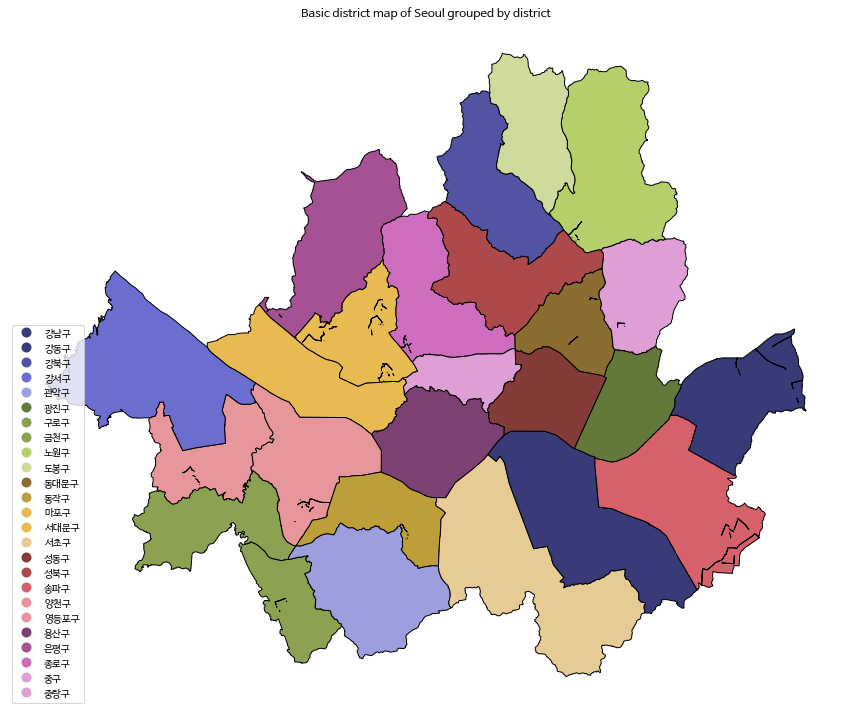

In [35]:
ax = seoul.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("Basic district map of Seoul grouped by district")
ax.set_axis_off()
plt.show()

### 좌표계 (Coordinate reference systems)

In [36]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
# # 이전의 좌표계와 비교해보자.
countries_mercator = countries.to_crs(epsg=3857)

print(countries_mercator.geometry[113])

POLYGON ((2614241.130436479 7153601.785967645, 2619073.309504622 7070435.576908916, 2649953.2347877226 6999613.069934945, 2649314.6968394318 6926062.815965136, 2582555.8419753523 6888660.742470466, 2616898.8289239593 6804402.184097363, 2619021.536157463 6724260.516108001, 2675005.7822184064 6569348.0703989, 2663069.1494012605 6520185.512981648, 2607826.9879829274 6499876.023004115, 2506742.403952631 6356150.531597702, 2535459.3538433225 6279511.087609827, 2511160.3962435066 6289421.884152675, 2405370.1902158973 6355008.512342296, 2325236.554002487 6330832.415777705, 2272680.8540422777 6348389.6323475735, 2206911.4453683435 6311783.64968567, 2150771.879265926 6372407.960023718, 2105004.2403776343 6349141.515028633, 2098722.4075890477 6359484.523483149, 2047489.804278448 6444306.756093704, 1964727.2325482017 6454772.762874232, 1954165.4697278284 6509230.959613078, 1877822.7930452595 6528767.982364263, 1861203.5486073168 6483723.521564442, 1800732.2791259561 6519788.224792923, 1807675.660

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


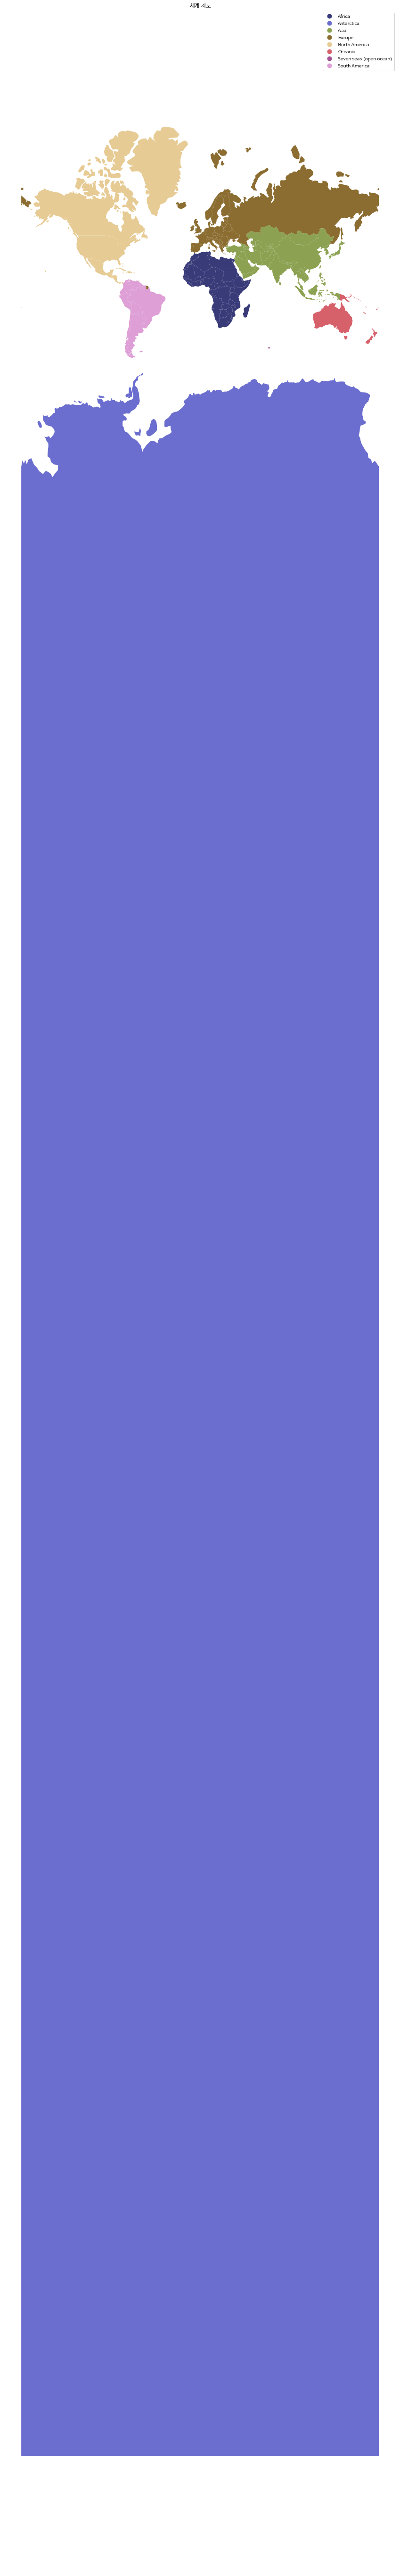

In [38]:
ax = countries_mercator.plot(figsize=(80, 100), column='continent', cmap="tab20b", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.rc('axes', unicode_minus=False)
plt.show()